# Chronic Kidney Disease Prediction 

Chronic kidney disease (CKD) is a condition where the kidneys are damaged and can't filter blood properly. This can cause excess fluid and waste to build up in the body, leading to other health problems. CKD is a common condition that often occurs with age, but it can affect anyone. It's more common in people who are Black or of South Asian origin.<sup>[1]</sup>

## About Dataset

I used the dataset recommended in the task document. The dataset is published at the *__UC Irvine Machine Learning Repository__*. 

The dataset contains data collected over 2 months of period from nearby hosptials. The Dataset contains around 25 features of which class is the target feature which contains 2 classes either *__ckd__ (Chronic Kidney Disease) or __notckd__ (not Chronic Kidney Disease)*. 

##### Features Inforamtion

The dataset contains 24 + class = 25 features ( 11  numeric ,14  nominal)<sup>[2]</sup>
1. Age(numerical) - age in years<sup>[2]</sup>
2. Blood Pressure(numerical) - bp in mm/Hg<sup>[2]</sup>
3. Specific Gravity(nominal) - sg - (1.005,1.010,1.015,1.020,1.025)<sup>[2]</sup>
4. Albumin(nominal) - al - (0,1,2,3,4,5)<sup>[2]</sup>
5. Sugar(nominal) - su - (0,1,2,3,4,5)<sup>[2]</sup>
6. Red Blood Cells(nominal) - rbc - (normal,abnormal)<sup>[2]</sup>
7. Pus Cell (nominal) - pc - (normal,abnormal)<sup>[2]</sup>
8. Pus Cell clumps(nominal) - pcc - (present,notpresent)<sup>[2]</sup>
9. Bacteria(nominal) - ba  - (present,notpresent)<sup>[2]</sup>
10. Blood Glucose Random(numerical) - bgr in mgs/dl<sup>[2]</sup>
11. Blood Urea(numerical) - bu in mgs/dl<sup>[2]</sup>
12. Serum Creatinine(numerical) - sc in mgs/dl<sup>[2]</sup>
13. Sodium(numerical) - sod in mEq/L<sup>[2]</sup>
14. Potassium(numerical) - pot in mEq/L<sup>[2]</sup>
15. Hemoglobin(numerical) - hemo in gms<sup>[2]</sup>
16. Packed  Cell Volume(numerical)<sup>[2]</sup>
17. White Blood Cell Count(numerical) - wc in cells/cumm<sup>[2]</sup>
18. Red Blood Cell Count(numerical) - rc in millions/cmm<sup>[2]</sup>
19. Hypertension(nominal) - htn - (yes,no)<sup>[2]</sup>
20. Diabetes Mellitus(nominal) - dm - (yes,no)<sup>[2]</sup>
21. Coronary Artery Disease(nominal) - cad - (yes,no)<sup>[2]</sup>
22. Appetite(nominal) - appet - (good,poor)<sup>[2]</sup>
23. Pedal Edema(nominal) - pe - (yes,no)<sup>[2]</sup>	
24. Anemia(nominal) - ane - (yes,no)<sup>[2]</sup>
25. Class (nominal) - class - (ckd,notckd)<sup>[2]</sup>

***

In this notebook I tried to predict the CKD with the decision tree classifier.

## Import necessary packages

I am importing the dataset from the UC *Irvine's Machine Learning Repository*. The data can be directly imported with the help of **ucimlrepo** package. So first I am installing, And then importing it.

In [1]:
# !pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.tree import plot_tree

**Fetch Dataset from UCIML Repo**

As documented in UCIML Repo<sup>[3]</sup> I am directly importing the Chronic Kidney Dataset.

In [3]:
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336)

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(chronic_kidney_disease.data.original)
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


## EDA - Exploratory Data Analysis

Exploratory Data Analysis or EDA is a way to identify the general patterns in the data. EDA is an important and first step in any data analysis, which helps understand the the features of the dataset. EDA helps in understanding the outliers and the correlations between the features, which ingeneral helps in identifying the patterns.

**Describe Dataset**

The describe function shows the average , minimum ,standard deviation ,maximum,count 25% of column,50% of column,75% of column of the each column.

In [4]:
df.describe(include = "all")

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,391.000000,388.000000,353.000000,354.000000,351.000000,248,335,396,396,356.000000,...,329.000000,294.000000,269.000000,398,398,398,399,399,399,400
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,NaN,...,NaN,NaN,NaN,2,3,2,2,2,2,3
top,NaN,NaN,NaN,NaN,NaN,normal,normal,notpresent,notpresent,NaN,...,NaN,NaN,NaN,no,no,no,good,no,no,ckd
freq,NaN,NaN,NaN,NaN,NaN,201,259,354,374,NaN,...,NaN,NaN,NaN,251,260,364,317,323,339,248
mean,51.483376,76.469072,1.017408,1.016949,0.450142,NaN,NaN,NaN,NaN,148.036517,...,38.884498,8406.122449,4.707435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,17.169714,13.683637,0.005717,1.352679,1.099191,NaN,NaN,NaN,NaN,79.281714,...,8.990105,2944.474190,1.025323,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,50.000000,1.005000,0.000000,0.000000,NaN,NaN,NaN,NaN,22.000000,...,9.000000,2200.000000,2.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,42.000000,70.000000,1.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,99.000000,...,32.000000,6500.000000,3.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,55.000000,80.000000,1.020000,0.000000,0.000000,NaN,NaN,NaN,NaN,121.000000,...,40.000000,8000.000000,4.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,64.500000,80.000000,1.020000,2.000000,0.000000,NaN,NaN,NaN,NaN,163.000000,...,45.000000,9800.000000,5.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Dataset Information**

Pandas.DataFrame.info() returns the detailed the dataframe information like indexed dtypes, columns, non-null values, memory usage etc.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

**Null Value Check**

Pandas.DataFrame.isnull() returns the boolean True for any null value in the dataframe and False for all the other remaining values. And sum() returns the sum of all the true values in a column.

In [6]:
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

**Correlation Mapping**

Pandas.dataframe.corr() finds the pairwise correlation of all columns in the Dataframe. As document depects any NaN/None values are automatically excluded. 

Pearson, Kendall and Spearman correlation are currently computed using pairwise complete observations as mentioned in pandas documentation<sup>[4]</sup>.

Here I am trying th get the pairwise correlations between the features. By default the Pandas.dataframe.corr() returns pairwise correlation between numeric features of the dataaset.

In [7]:
df_corr = df.corr()

**Correlation Heatmap**

<AxesSubplot:title={'center':'Correlation in Dataset'}>

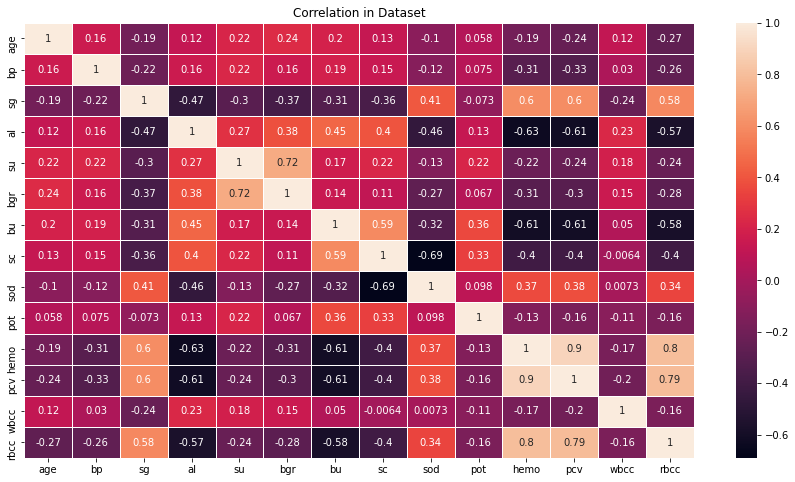

In [8]:
plt.figure(figsize=(15,8));
plt.title("Correlation in Dataset")
sns.heatmap(df_corr,linewidth=1,annot=True)

**Duplicate Value Check**

Checking if the dataframe has any duplicate values. To check the same I used duplicated() on dataframe which returns the boolean True/False value and following value_counts() returns the cumulative count of the Ture and False.

In [9]:
df.duplicated().value_counts()

False    400
dtype: int64

Checking the unique classes in the dataframe.

In [10]:
df["class"].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: class, dtype: int64

In [11]:
df["class"].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

There is a duplicate class value with the tab (\t) included as "ckd\t". Checking the number of data points for the calss "ckd\t" in the following cell.

In [12]:
df[df["class"] == "ckd\t"]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
37,72.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,137.0,...,28.0,6900.0,2.5,yes,yes,no,poor,no,yes,ckd\t
230,65.0,60.0,1.01,2.0,0.0,normal,abnormal,present,notpresent,192.0,...,NaN,9500.0,NaN,yes,yes,no,poor,no,no,ckd\t


Now replacing the "ckd\t" class with "ckd" as it is the valid class value.

In [13]:
df["class"] = df["class"].replace("ckd\t","ckd",regex=True)

Checking the class distribution with the help data visualisation tool matplotlib.

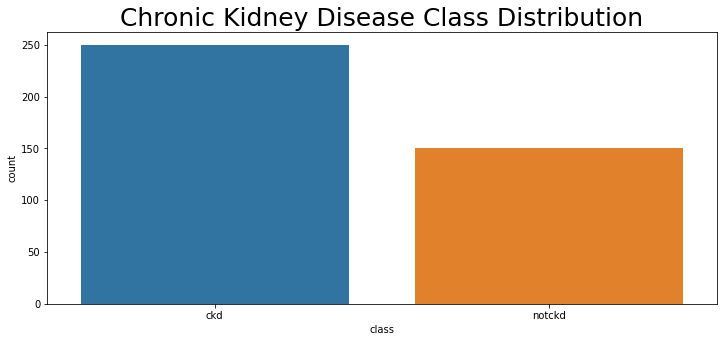

In [14]:
plt.figure(figsize = (12,5))
sns.countplot(data = df, x = "class")
plt.title("Chronic Kidney Disease Class Distribution", fontsize=25)
plt.show()

Here I am checking if **age** has any null values. And if find any, filling null value as a mean of all the vlaues in the column.

In [15]:
df["age"].isnull().sum()

9

In [16]:
df["age"] = df["age"].fillna(df["age"].mean())

In [17]:
df.info() #Getting the dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

**Filling Null Values**

In following cell I am looking at the numeric columns and filling numeric null values with median of all the available values.

In [18]:
numerical=[]
for column in df.columns:
    if df[column].dtype == "float64":
        numerical.append(column)

for column in df.columns:
    if column in numerical:
        df[column].fillna(df[column].median(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

### Label Encoder

Label Encoding provides the simple and effective way of converting the categorical values to numerical ones. With the scikit-learn's LabelEncoder function we can encode the categorical values efficiently.

In [19]:
le = LabelEncoder()
object_col = [column for column in df.columns if df[column].dtype == "object"]
for column in object_col:
    df[column] = le.fit_transform(df[column])

In [20]:
df.info() #Getting the dataframe info post label encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    float64
 5   rbc     400 non-null    int64  
 6   pc      400 non-null    int64  
 7   pcc     400 non-null    int64  
 8   ba      400 non-null    int64  
 9   bgr     400 non-null    float64
 10  bu      400 non-null    float64
 11  sc      400 non-null    float64
 12  sod     400 non-null    float64
 13  pot     400 non-null    float64
 14  hemo    400 non-null    float64
 15  pcv     400 non-null    float64
 16  wbcc    400 non-null    float64
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    int64  
 19  dm      400 non-null    int64  
 20  cad     400 non-null    int64  
 21  appet   400 non-null    int64  
 22  pe

In [21]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38.0,6000.0,4.8,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,1,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,1,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,1,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,1,0,0,0,0,1


## Data Visualisation 

Here in following cells I am trying find correlation between the combination of columns. 

The normal range of the blood urea is in between 15 to 40 as blood urea goes beyond 40 there might be chances of the kidney failure same can be observed in following scatter plot.

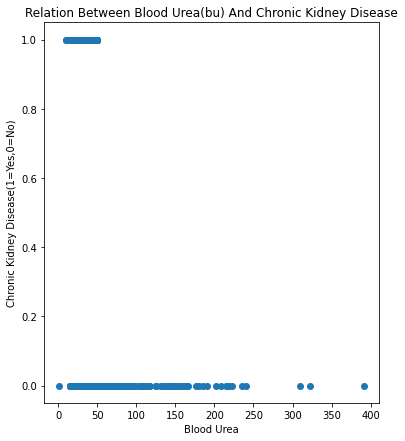

In [22]:
fig, ax = plt.subplots(figsize=(6,7))
M = df[["bu"]]
N = df[["class"]]
plt.title("Relation Between Blood Urea(bu) And Chronic Kidney Disease")
plt.xlabel("Blood Urea")
plt.ylabel("Chronic Kidney Disease(1=Yes,0=No)")
ax.scatter(M,N)
plt.show()

The normal serum creatine range is inbetween 0.5 to 1.5. If Serum Creatine goes beyond 1.5, there are higher chances of kidney failure and same can be observed in following scatter plot.

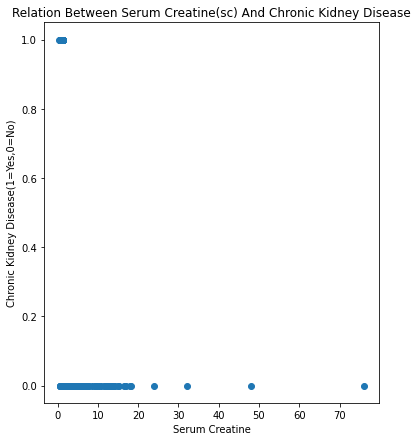

In [23]:
fig, ax = plt.subplots(figsize=(6,7))
M = df[["sc"]]
N = df[["class"]]
plt.title("Relation Between Serum Creatine(sc) And Chronic Kidney Disease")
plt.xlabel("Serum Creatine")
plt.ylabel("Chronic Kidney Disease(1=Yes,0=No)")
ax.scatter(M,N)
plt.show()

Hypertension is one of the most major factor in Kidney failures and same can be observed in following scatter plot.

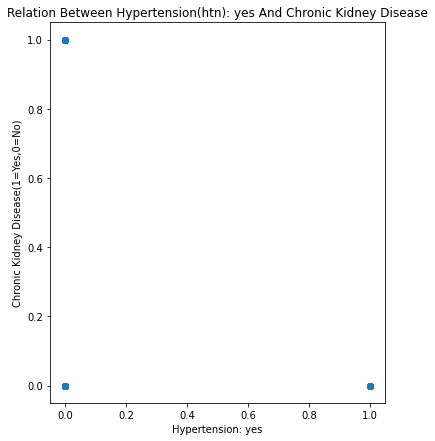

In [24]:
fig, ax = plt.subplots(figsize=(6,7))
M = df[["htn"]]
N = df[["class"]]
plt.title("Relation Between Hypertension(htn): yes And Chronic Kidney Disease")
plt.xlabel("Hypertension: yes")
plt.ylabel("Chronic Kidney Disease(1=Yes,0=No)")
ax.scatter(M,N)
plt.show()

If urine albumin goes beyond its normal range it leads to protein leakage which eventually leads to Kidney failure if not dignosed and treated in time.

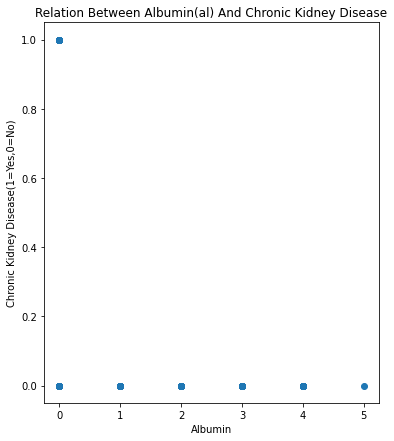

In [25]:
fig, ax = plt.subplots(figsize=(6,7))
M = df[["al"]]
N = df[["class"]]
plt.title("Relation Between Albumin(al) And Chronic Kidney Disease")
plt.xlabel("Albumin")
plt.ylabel("Chronic Kidney Disease(1=Yes,0=No)")
ax.scatter(M,N)
plt.show()

Diabetes as well plays vital role in kidney failures.

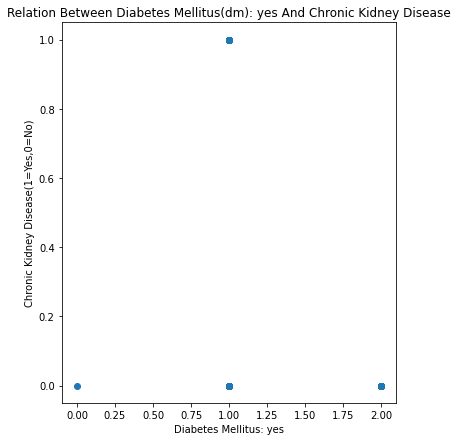

In [26]:
fig, ax = plt.subplots(figsize=(6,7))
M = df[["dm"]]
N = df[["class"]]
plt.title("Relation Between Diabetes Mellitus(dm): yes And Chronic Kidney Disease")
plt.xlabel("Diabetes Mellitus: yes")
plt.ylabel("Chronic Kidney Disease(1=Yes,0=No)")
ax.scatter(M,N)
plt.show()

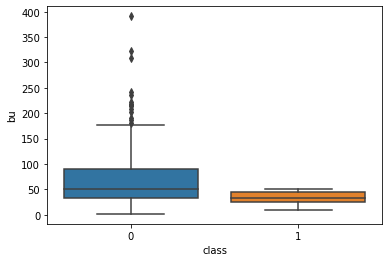

In [27]:
sns.boxplot(x = df["class"], y = df["bu"])
plt.show();

<AxesSubplot:xlabel='su', ylabel='htn'>

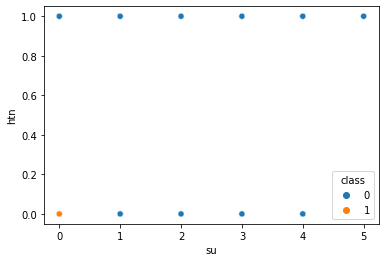

In [28]:
sns.scatterplot(data = df,x = "su",y = "htn",hue = 'class')

<AxesSubplot:xlabel='su'>

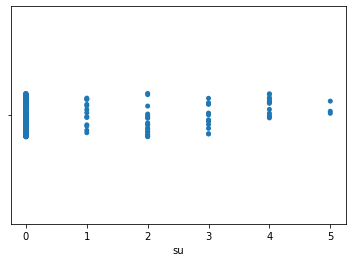

In [29]:
sns.stripplot(x = df["su"])

Text(0.5, 1.0, 'Boxplot of Hypertension and Sugar')

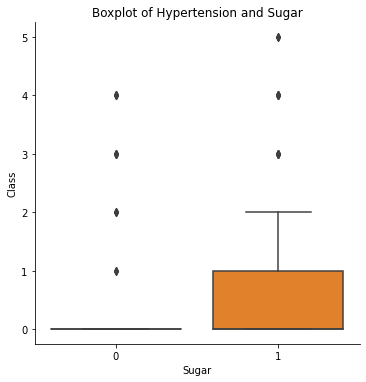

In [30]:
sns.catplot(x = "htn",y = "su",data = df,kind = "box");
plt.xlabel("Sugar")
plt.ylabel("Class")
plt.title("Boxplot of Hypertension and Sugar")

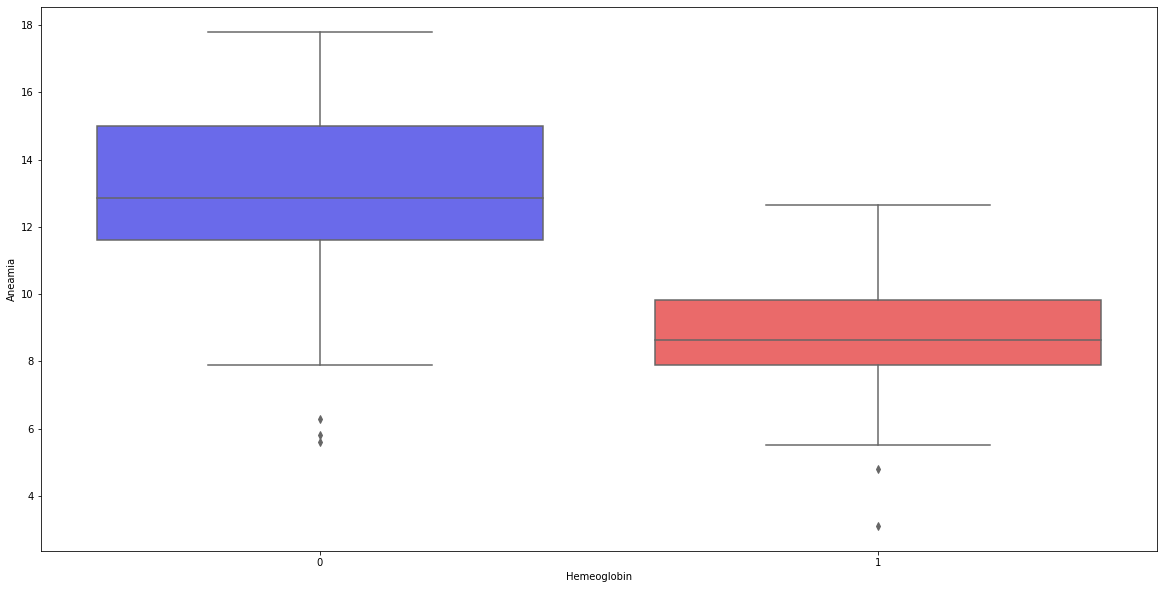

In [31]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df, x = "ane", y = "hemo", palette = "seismic")
plt.xlabel("Hemeoglobin")
plt.ylabel("Aneamia")
plt.show()

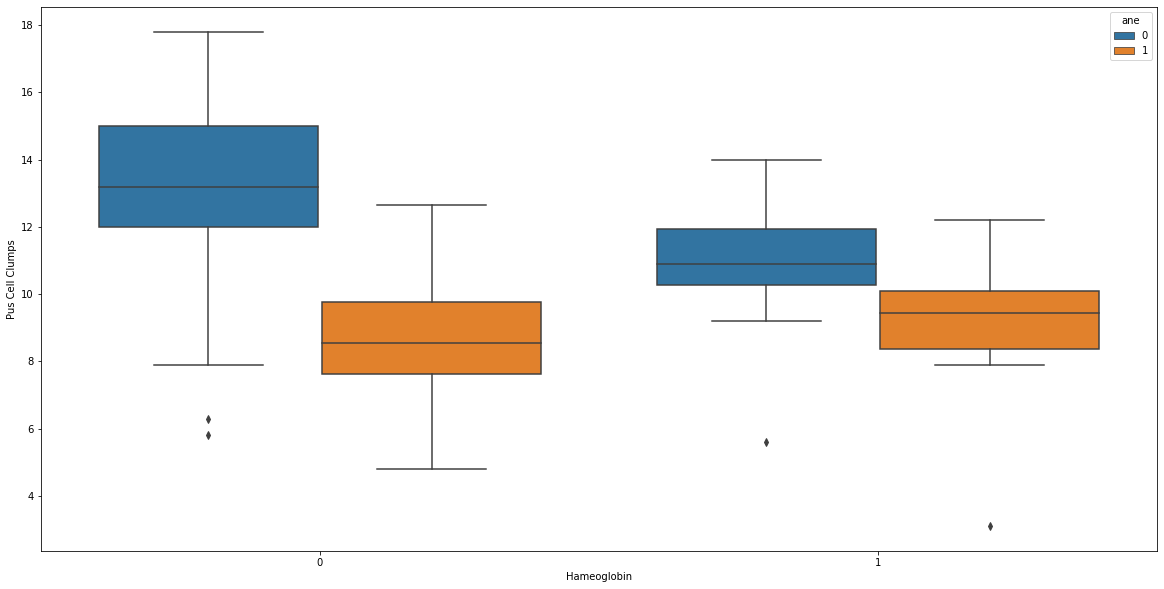

In [32]:
plt.figure(figsize = (20,10))
sns.boxplot(data = df, y = "hemo", x = "pcc", hue = "ane")
plt.xlabel("Hameoglobin")
plt.ylabel("Pus Cell Clumps")
plt.show()

Understanding the data distribution over a class categories.

In [33]:
df.groupby("class").mean()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
class,,,,,,,,,,,,,,,,,,,,,
0,54.443468,79.640000,1.014940,1.44,0.632,0.812,0.696,0.168,0.088,167.148000,...,11.016000,34.832000,8646.000000,4.3692,0.588,1.544,0.136,0.328,0.304,0.24
1,46.549889,71.466667,1.022333,0.00,0.000,1.000,1.000,0.000,0.000,108.253333,...,15.086667,46.166667,7719.333333,5.3520,0.000,1.000,0.000,0.000,0.000,0.00


## Defining Target and Independent Variables

Here **class** is the target variable and all the other features independent variables which helps in prediction.

In [34]:
X = df.loc[:, df.columns != "class"]
y = df[["class"]]

## Split Data into Train & Test

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=100)

In [36]:
print("Training Data ::-")
print("X Shape:-" ,X_train.shape)
print("y Shape:-" ,y_train.shape)

Training Data ::-
X Shape:- (320, 24)
y Shape:- (320, 1)


In [37]:
print("Testing Data ::-")
print("X Shape:-" ,X_test.shape)
print("y Shape:-" ,y_test.shape)

Testing Data ::-
X Shape:- (80, 24)
y Shape:- (80, 1)


### Pearson Correlation heatmap

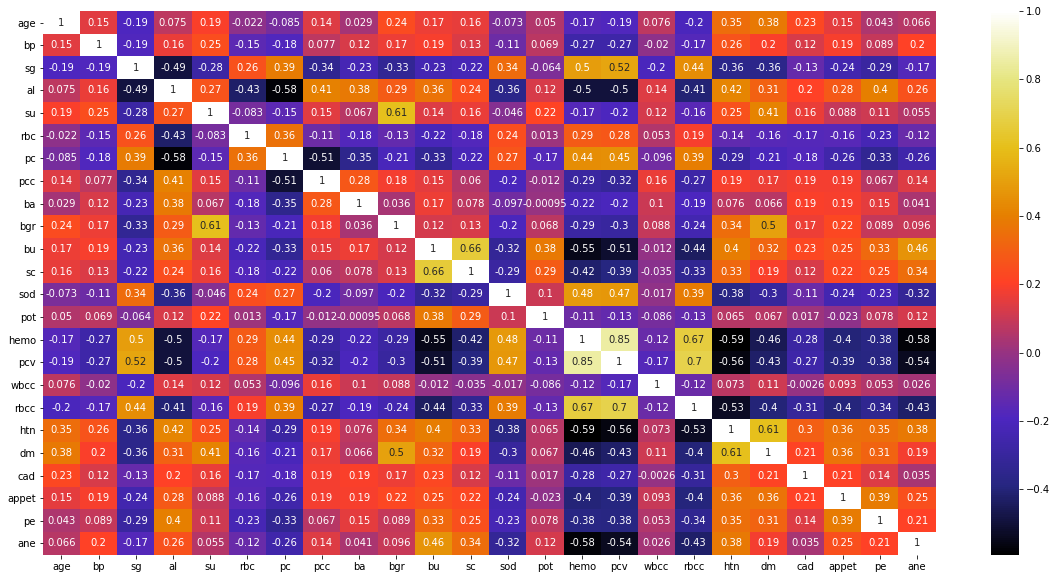

In [38]:
plt.figure(figsize = (20,10))
cor = X_train.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap)
plt.show()

The following function gets the correlated features. It first removes feature correlated with other features.

In [39]:
def correlated_features(data, corr_threshold):
    col_corr = set()  # Set of correlated features
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > corr_threshold: # getting absolute coeff
                column = corr_matrix.columns[i]  # extracting the column name
                col_corr.add(column)
    return col_corr

In [40]:
corr_threshold = 0.75
corr_features = correlated_features(X_train, corr_threshold)
len(set(corr_features))

1

In [41]:
corr_features

{'pcv'}

Removing correlated features found in the dataset.

In [42]:
X_train.drop(corr_features,axis = 1)
X_test.drop(corr_features,axis = 1)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pot,hemo,wbcc,rbcc,htn,dm,cad,appet,pe,ane
248,59.0,70.0,1.010,1.0,3.0,0,0,0,0,424.0,...,4.5,12.60,10200.0,4.1,1,2,1,0,0,0
318,61.0,70.0,1.025,0.0,0.0,1,1,0,0,120.0,...,3.5,17.40,7000.0,5.3,0,1,0,0,0,0
173,17.0,70.0,1.015,1.0,0.0,0,1,0,0,22.0,...,2.8,13.10,11200.0,4.8,0,1,0,0,0,0
285,66.0,70.0,1.020,0.0,0.0,1,1,0,0,94.0,...,3.9,16.00,5300.0,5.9,0,1,0,0,0,0
184,54.0,60.0,1.015,3.0,2.0,1,0,0,0,352.0,...,4.5,11.30,5800.0,3.6,1,2,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,47.0,60.0,1.020,0.0,0.0,1,1,0,0,117.0,...,3.5,13.00,5200.0,5.6,0,1,0,0,0,0
166,27.0,60.0,1.020,0.0,0.0,1,1,0,0,76.0,...,4.3,12.65,8000.0,4.8,0,1,0,1,1,1
198,59.0,100.0,1.020,4.0,2.0,1,1,0,0,252.0,...,4.7,11.20,26400.0,3.9,1,2,0,1,1,0
267,48.0,80.0,1.025,0.0,0.0,1,1,0,0,122.0,...,3.9,13.90,9500.0,4.8,0,1,0,0,0,0


## Standarlization of X variables

Machine Learning models tend to work better and as expected when features have relatively similar scale and close to normal distribution. Although with the real-world data this may be hardly the case. So, it is always advised to standardise the features with the scikit-learn's StandardScaler(). 

It standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. StandardScaler does not meet the strict definition of scale I introduced earlier. StandardScaler results in a distribution with a standard deviation equal to 1. The variance is equal to 1 also, because variance = standard deviation squared. And 1 squared is 1. StandardScaler makes the mean of the distribution approximately 0.<sup>[5]</sup>

In [43]:
std_scalar = StandardScaler()
X = std_scalar.fit_transform(X)

In [44]:
X.shape

(400, 24)

## Decision Tree Classifier

Decision tree is one of the Classic supervised learning algorithms which mostly used to solve the classification problems. 

A decision tree classifier creates a classification model by building a decision tree. Each node in the tree specifies a unique test on an attribute, and each branch descending from that node corresponds to one of the possible outcomes for that attribute.

### Modeling

In [45]:
model = DecisionTreeClassifier(random_state=100)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=100)

### Model Prediction

In [46]:
y_predict = model.predict(X_test)
print(y_predict)

[0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0
 1 1 0 0 1 0]


### Probability of Each Predicted Class

In [47]:
print(model.predict_proba(X_test))

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


### Model Evaluation

In [48]:
print(confusion_matrix(y_test,y_predict))

[[49  2]
 [ 0 29]]


In [49]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        51
           1       0.94      1.00      0.97        29

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



### Decision Tree Visualisation

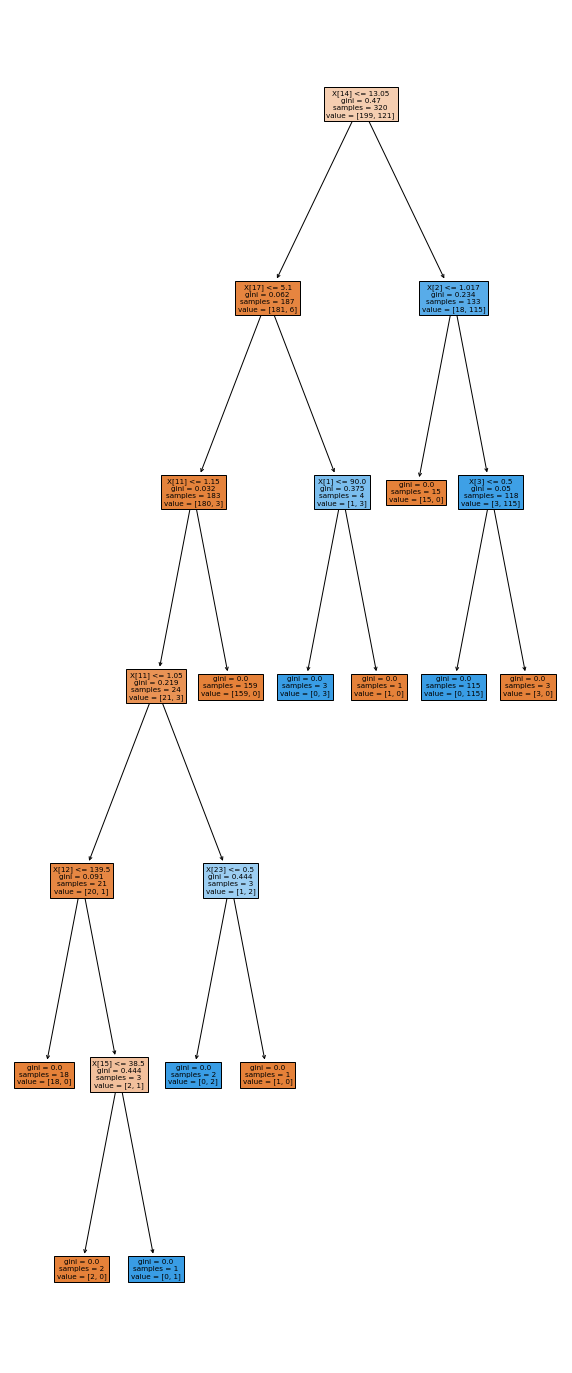

In [50]:
plt.figure(figsize = (10,25))
plot_tree(model,filled = True);

#### Zipping the model

In [51]:
import pickle
from zipfile import ZipFile

pickle.dump(model, open('Chronic_Kidney_Disease_Prediction_Model.pkl','wb'))

with ZipFile('Chronic_Kidney_Disease_Prediction_Model.zip', 'w') as myzip:
    myzip.write("Chronic_Kidney_Disease_Prediction_Model.pkl")
    myzip.write("Decision_tree_model_evaluation.png")
    myzip.write("Task_1P-C.ipynb")
    myzip.write("Task_1P-C.pdf")

## Conclusion 

Here I used the **Chronic Kidney Disease** dataset published at **UCIML Repo**<sup>[3]</sup>. I tried to predict the **Chronic Kidney Disease** using the Decision tree classification approach. As we can see from the model evaluations was able to achieve the accuracy of 97%. 
We can try to gain more accuracy by refining train-test split ratio or considering more significant features from the dataset with the help of domain experts.

## References

1. Google search (Google's GenAI Search Labs)
2. https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease - Additional Variable Information
3. https://github.com/uci-ml-repo/ucimlrepo
4. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
5. https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02#:~:text=StandardScaler%20is%20the%20industry's%20go,of%20scale%20I%20introduced%20earlier